# Generation the circuit for H4

## Classical calculations:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utility import *
import tequila as tq
threshold = 1e-6 #Cutoff for UCC MP2 amplitudes and QCC ranking gradients

basis = 'sto-3g'

In [12]:
bond_lengths = np.linspace(0.8,2.7,15)
#Run FCI
FCI_PES = obtain_PES('h4', bond_lengths, basis, method='fci')
#Run HF
HF_PES = obtain_PES('h4', bond_lengths, basis,  method='hf')
#Run CCSD
CCSD_PES = obtain_PES('h4', bond_lengths, basis,  method='ccsd')

E = -1.728280864746984 Eh
E = -1.8757673115297737 Eh
E = -1.9436685341419784 Eh
E = -1.968116870153743 Eh
E = -1.968871750533924 Eh
E = -1.9575160224134402 Eh
E = -1.941121962708516 Eh
E = -1.924006921870783 Eh
E = -1.908620786307281 Eh
E = -1.8960726556134475 Eh
E = -1.8865510355260706 Eh
E = -1.8797113367238416 Eh
E = -1.8749960099801717 Eh
E = -1.8718427824231205 Eh
E = -1.8697821728146733 Eh
E = -1.6019400748316626 Eh
E = -1.7310111342441017 Eh
E = -1.7791045408792772 Eh
E = -1.7818090946446667 Eh
E = -1.7585910209903717 Eh
E = -1.7209124635779496 Eh
E = -1.67587034187085 Eh
E = -1.6279977412549202 Eh
E = -1.5802294832603305 Eh
E = -1.5344454873708084 Eh
E = -1.4917887476436849 Eh
E = -1.4528712693195471 Eh
E = -1.4179286302686067 Eh
E = -1.386943949202337 Eh
E = -1.359742571061905 Eh
E = -1.730297072383217 Eh
E = -1.8787802508847276 Eh
E = -1.9481335329118372 Eh
E = -1.9745957353524095 Eh
E = -1.9780170268528496 Eh
E = -1.9698470785114286 Eh
E = -1.9566753319492185 Eh
E = -1.94214

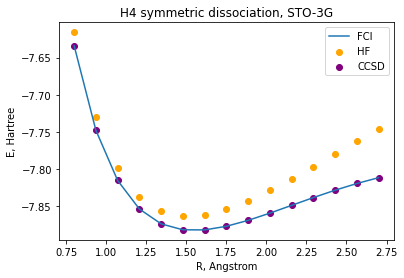

In [5]:
#Plot H4 PESs

plt.title('H4 symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## Generating Qubit Hamiltonians

In [6]:
qubit_transf = 'jw' # Jordan-Wigner transformations
h4 = get_qubit_hamiltonian(mol='h4', geometry=1.5, basis='sto3g', qubit_transf=qubit_transf)
print(h4)

-0.882320546851374 [] +
-0.0340583850225032 [X0 X1 Y2 Y3] +
-0.03405838502250319 [X0 X1 Y4 Y5] +
-0.023093664326496455 [X0 X1 Y6 Y7] +
0.0340583850225032 [X0 Y1 Y2 X3] +
0.03405838502250319 [X0 Y1 Y4 X5] +
0.023093664326496455 [X0 Y1 Y6 X7] +
-0.011573113480196618 [X0 Z1 X2 X4 Z5 X6] +
-0.03525752032766731 [X0 Z1 X2 X5 Z6 X7] +
-0.03525752032766731 [X0 Z1 X2 Y5 Z6 Y7] +
-0.011573113480196618 [X0 Z1 Y2 Y4 Z5 X6] +
0.035257520327667304 [X0 Z1 Z2 X3 Y4 Z5 Z6 Y7] +
0.02368440684747069 [X0 Z1 Z2 X3 X5 X6] +
-0.035257520327667304 [X0 Z1 Z2 Y3 Y4 Z5 Z6 X7] +
0.02368440684747069 [X0 Z1 Z2 Y3 Y5 X6] +
0.0340583850225032 [Y0 X1 X2 Y3] +
0.03405838502250319 [Y0 X1 X4 Y5] +
0.023093664326496455 [Y0 X1 X6 Y7] +
-0.0340583850225032 [Y0 Y1 X2 X3] +
-0.03405838502250319 [Y0 Y1 X4 X5] +
-0.023093664326496455 [Y0 Y1 X6 X7] +
-0.011573113480196618 [Y0 Z1 X2 X4 Z5 Y6] +
-0.011573113480196618 [Y0 Z1 Y2 Y4 Z5 Y6] +
-0.03525752032766731 [Y0 Z1 Y2 X5 Z6 X7] +
-0.03525752032766731 [Y0 Z1 Y2 Y5 Z6 Y7] +
-0.0352

In [7]:
h4_tapered = taper_hamiltonian(h4, n_spin_orbitals=8, n_electrons=4, qubit_transf=qubit_transf)

## Tequila stuff

In [10]:
trotter_steps = 1

xyz_data = get_molecular_data('h4', geometry=1.5, xyz_format=True)
basis='sto-3g'

h4_tq = tq.quantumchemistry.Molecule(geometry=xyz_data, basis_set=basis)

print('Number of spin-orbitals (qubits): {} \n'.format(2*h4_tq.n_orbitals))

E_FCI = h4_tq.compute_energy(method='fci')

print('FCI energy: {}'.format(E_FCI))

Number of spin-orbitals (qubits): 8 

FCI energy: -1.9551250115194279


In [11]:
H = h4_tq.make_hamiltonian()

print("\nHamiltonian has {} terms\n".format(len(H)))

U_UCCSD = h4_tq.make_uccsd_ansatz(initial_amplitudes='MP2',threshold=threshold, trotter_steps=trotter_steps)

E = tq.ExpectationValue(H=H, U=U_UCCSD)

print('\nNumber of UCCSD amplitudes: {} \n'.format(len(E.extract_variables())))

print('\nStarting optimization:\n')

result = tq.minimize(objective=E, method="BFGS", initial_values={k:0.0 for k in E.extract_variables()}, tol=1e-6)

print('\nObtained UCCSD energy: {}'.format(result.energy))


Hamiltonian has 93 terms


Number of UCCSD amplitudes: 8 


Starting optimization:

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 512 expectationvalues

active variables : 8

E=-1.71399864  angles= {(3, 1, 2, 0): 0.0, (3, 0, 3, 0): 0.0, (2, 0, 3, 1): 0.0, (2, 1, 2, 1): 0.0, (3, 1, 3, 1): 0.0, (3, 0, 2, 1): 0.0, (2, 0, 2, 0): 0.0, (2, 1, 3, 0): 0.0}  samples= None
E=-1.11359858  angles= {(3, 1, 2, 0): -0.46722960472106934, (3, 0, 3, 0): -0.18474936485290527, (2, 0, 3, 1): -0.46722960472106934, (2, 1, 2, 1): -0.19438719749450684, (3, 1, 3, 1): -0.30623817443847656, (3, 0, 2, 1): -0.004305601119995117, (2, 0, 2, 0): -0.27246713638305664, (2, 1, 3, 0): -0.004305601119995117}  samples= None
E=-1.77345576  angles= {(3, 1, 2, 0): -0.07621729618876538, (3, 0, 3, 0): -0.030137424768035437, (2, 0, 

E=-1.95141279  angles= {(3, 1, 2, 0): -0.3845804849802186, (3, 0, 3, 0): -0.1269786112823639, (2, 0, 3, 1): -0.09006284190825767, (2, 1, 2, 1): -0.6712878675109274, (3, 1, 3, 1): -0.04694346526938802, (3, 0, 2, 1): -0.3088997835658515, (2, 0, 2, 0): -0.046615541943839864, (2, 1, 3, 0): -0.01487060352426069}  samples= None
E=-1.95142059  angles= {(3, 1, 2, 0): -0.40167726606151455, (3, 0, 3, 0): -0.12693943488627465, (2, 0, 3, 1): -0.07293281457204874, (2, 1, 2, 1): -0.6716046027151545, (3, 1, 3, 1): -0.04663310184794315, (3, 0, 2, 1): -0.29429509939382414, (2, 0, 2, 0): -0.04647217363121218, (2, 1, 3, 0): -0.028217948192006292}  samples= None
E=-1.95143375  angles= {(3, 1, 2, 0): -0.4356173255146146, (3, 0, 3, 0): -0.12688457228191735, (2, 0, 3, 1): -0.039242374221199444, (2, 1, 2, 1): -0.6721000490868932, (3, 1, 3, 1): -0.04616432720710999, (3, 0, 2, 1): -0.2670673135632964, (2, 0, 2, 0): -0.046246349291354724, (2, 1, 3, 0): -0.053586335635791196}  samples= None
E=-1.95145217  angles=

E=-1.95156585  angles= {(3, 1, 2, 0): -0.8044242204303917, (3, 0, 3, 0): -0.1272361099993765, (2, 0, 3, 1): 0.31446665278348407, (2, 1, 2, 1): -0.6718294596273381, (3, 1, 3, 1): -0.046802698906883516, (3, 0, 2, 1): 0.001889184161834992, (2, 0, 2, 0): -0.04619765333166982, (2, 1, 3, 0): -0.3376982003091496}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8044242204303917, (3, 0, 3, 0): -0.1272361099993765, (2, 0, 3, 1): 0.31446665278348407, (2, 1, 2, 1): -0.6718294596273381, (3, 1, 3, 1): -0.046802698906883516, (3, 0, 2, 1): 0.0018891841618349928, (2, 0, 2, 0): -0.04619765333166982, (2, 1, 3, 0): -0.3376982003091496}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8044242204695282, (3, 0, 3, 0): -0.12723610999898294, (2, 0, 3, 1): 0.31446665282360103, (2, 1, 2, 1): -0.6718294596275668, (3, 1, 3, 1): -0.04680269890694207, (3, 0, 2, 1): 0.001889184168867915, (2, 0, 2, 0): -0.04619765333203717, (2, 1, 3, 0): -0.33769820031953607}  samples= None
E=-1.95156585  angles= {(3, 1

E=-1.95156585  angles= {(3, 1, 2, 0): -0.8044256126391748, (3, 0, 3, 0): -0.12723609599909286, (2, 0, 3, 1): 0.3144680798714066, (2, 1, 2, 1): -0.6718294677636647, (3, 1, 3, 1): -0.046802700989607614, (3, 0, 2, 1): 0.0018894343454214672, (2, 0, 2, 0): -0.04619766639939182, (2, 1, 3, 0): -0.3376985697898615}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8044249164565103, (3, 0, 3, 0): -0.1272361030000218, (2, 0, 3, 1): 0.3144673662472114, (2, 1, 2, 1): -0.6718294636950439, (3, 1, 3, 1): -0.046802699948128475, (3, 0, 2, 1): 0.001889309239562364, (2, 0, 2, 0): -0.04619765986479612, (2, 1, 3, 0): -0.3376983850287325}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8044245683651781, (3, 0, 3, 0): -0.12723610650048628, (2, 0, 3, 1): 0.31446700943511374, (2, 1, 2, 1): -0.6718294616607335, (3, 1, 3, 1): -0.0468026994273889, (3, 0, 2, 1): 0.0018892466866328123, (2, 0, 2, 0): -0.04619765659749828, (2, 1, 3, 0): -0.33769829264816803}  samples= None
E=-1.95156585  angles= {(3, 1,

In [ ]:
H = tq.QubitHamiltonian.from_openfermion(get_qubit_hamiltonian('h4', 2, 'sto-3g', qubit_transf='jw'))

a = tq.Variable("tau_0")
U = construct_QMF_ansatz(8)
U += tq.gates.ExpPauli(paulistring=tq.PauliString.from_string("X(0)Y(1)X(2)X(3)"), angle=a)
print(U)

